Common Reynolds numbers: ['100', '400', '1000', '3200', '5000', '7500', '10000']


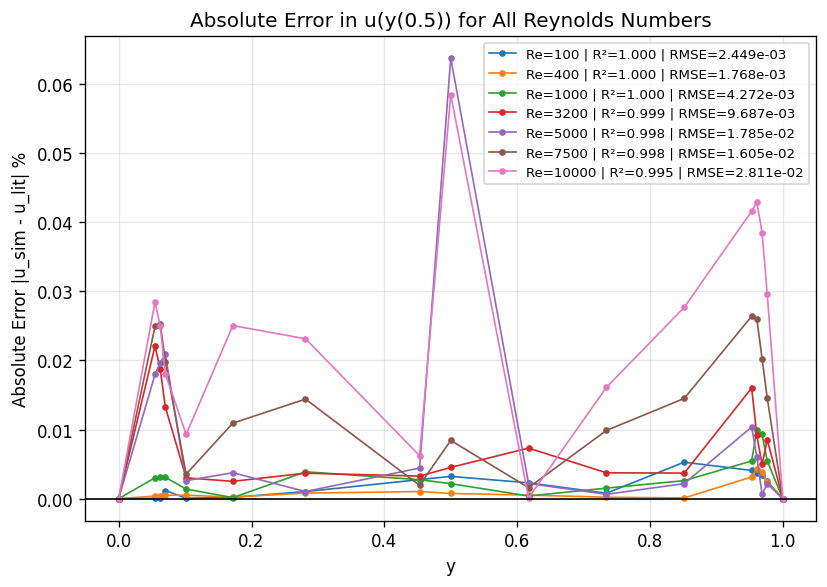

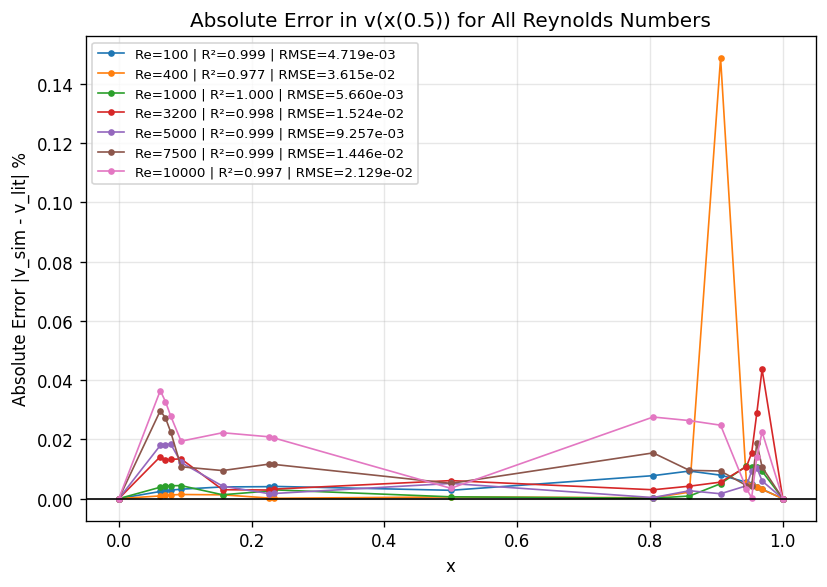

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# ===================== USER SETTINGS ===================== #

u_lit_file = "lid_driven_cavity_u_vs_y_literature1.txt"
v_lit_file = "lid_driven_cavity_v_vs_x_literature2.txt"
u_sim_file = "u vs y result simulation_formatted.txt"
v_sim_file = "v vs x result simulation_formatted.txt"

# ========================================================= #

def load_profile_table(filename, coord_label):
    df = pd.read_csv(filename, sep=r"[,\s]+", engine="python")
    df = df.rename(columns={df.columns[0]: coord_label})
    return df

def get_coord_and_value(df, coord_label, re_col):
    coord = df[coord_label].to_numpy(dtype=float)
    val = df[re_col].to_numpy(dtype=float)
    return coord, val

def compute_error_metrics(coord_lit, val_lit, coord_sim, val_sim):
    # Sorting
    idx_lit = np.argsort(coord_lit)
    idx_sim = np.argsort(coord_sim)

    x_lit = coord_lit[idx_lit]
    y_lit = val_lit[idx_lit]

    x_sim = coord_sim[idx_sim]
    y_sim = val_sim[idx_sim]

    # Interpolation
    y_interp = np.interp(x_lit, x_sim, y_sim)

    # ----- ABSOLUTE ERROR -----
    error = np.abs(y_interp - y_lit)

    # RMSE using absolute error
    rmse = np.sqrt(np.mean(error**2))

    # R² using signed error (statistically correct)
    r2 = r2_score(y_lit, y_interp)

    return x_lit, error, rmse, r2

# ===================== LOAD DATA ===================== #

u_lit_df = load_profile_table(u_lit_file, "y")
v_lit_df = load_profile_table(v_lit_file, "x")
u_sim_df = load_profile_table(u_sim_file, "y")
v_sim_df = load_profile_table(v_sim_file, "x")

# Common Reynolds numbers
lit_res = set(u_lit_df.columns[1:]) & set(v_lit_df.columns[1:])
sim_res = set(u_sim_df.columns[1:]) & set(v_sim_df.columns[1:])
common_res = sorted(lit_res & sim_res, key=lambda s: float(s))

print("Common Reynolds numbers:", common_res)

# ===================== PLOT: u vs y ===================== #

plt.figure(figsize=(7, 5), dpi=120)

for re in common_res:
    y_lit, u_lit = get_coord_and_value(u_lit_df, "y", re)
    y_sim, u_sim = get_coord_and_value(u_sim_df, "y", re)

    Y, err, rmse, r2 = compute_error_metrics(y_lit, u_lit, y_sim, u_sim)

    plt.plot(Y, err, marker='o', markersize=3, linewidth=1,
             label=f"Re={re} | R²={r2:.3f} | RMSE={rmse:.3e}")

plt.axhline(0, color='k', linewidth=1)
plt.xlabel("y")
plt.ylabel("Absolute Error |u_sim - u_lit| %")
plt.title("Absolute Error in u(y(0.5)) for All Reynolds Numbers")
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ===================== PLOT: v vs x ===================== #

plt.figure(figsize=(7, 5), dpi=120)

for re in common_res:
    x_lit, v_lit = get_coord_and_value(v_lit_df, "x", re)
    x_sim, v_sim = get_coord_and_value(v_sim_df, "x", re)

    X, err, rmse, r2 = compute_error_metrics(x_lit, v_lit, x_sim, v_sim)

    plt.plot(X, err, marker='o', markersize=3, linewidth=1,
             label=f"Re={re} | R²={r2:.3f} | RMSE={rmse:.3e}")

plt.axhline(0, color='k', linewidth=1)
plt.xlabel("x")
plt.ylabel("Absolute Error |v_sim - v_lit| %")
plt.title("Absolute Error in v(x(0.5)) for All Reynolds Numbers")
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
